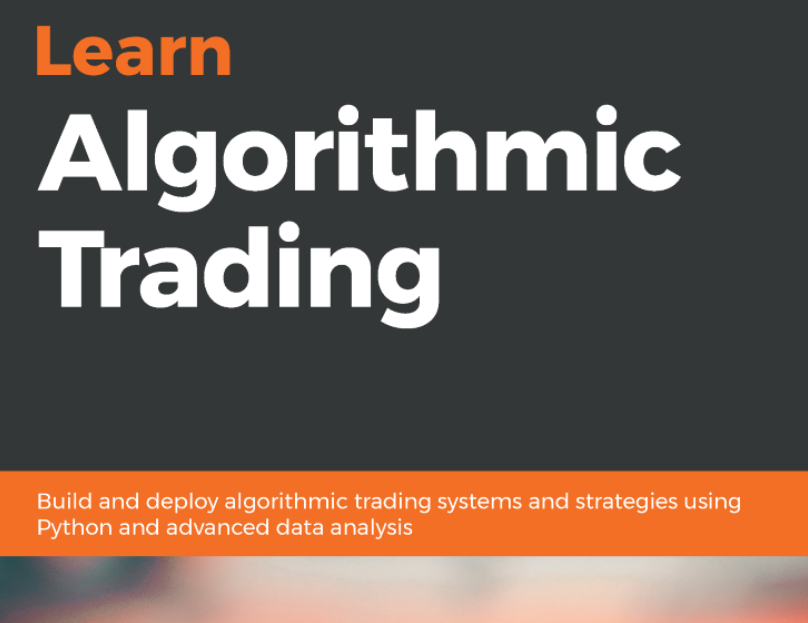

In [6]:
import pandas as pd
import talib 
import talib as ta
import numpy as np
from pandas_datareader.data import Options 
from binance.client import Client
from talib import MA_Type

import matplotlib.pyplot as plt

import datetime
from datetime import datetime

%matplotlib inline

#PLACE SECRETS ON .ENV
secs = open(".env", 'r').read()
secs = dict([i.split("=") for i in secs.split("\n") if i])

PUBLIC = secs["PUBLIC"]
SECRET = secs["SECRET"]


client = Client(api_key=PUBLIC, api_secret=SECRET)

klines = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_15MINUTE, "30 Apr 2020" ,"3 May 2020")

df = pd.DataFrame(klines, columns=["Open time", "Open", "High","Low", "Close", "Volume", "Close time", "Quote asset volume", "Number of trades", "tkb", "tkbq","ignore"])

op,clo,hi,low = df['Open'],df['Close'],df['High'],df['Low']

#result.plot(figsize=(20,10))
open_time   = [int(entry[0]) for entry in klines]
close       = [float(entry[4]) for entry in klines]
close_array = np.asarray(close)
new_time    = [datetime.fromtimestamp(time/1000) for time in open_time]

df['Open time'] = df['Open time'].apply( lambda x: datetime.fromtimestamp(x/1000) ) 


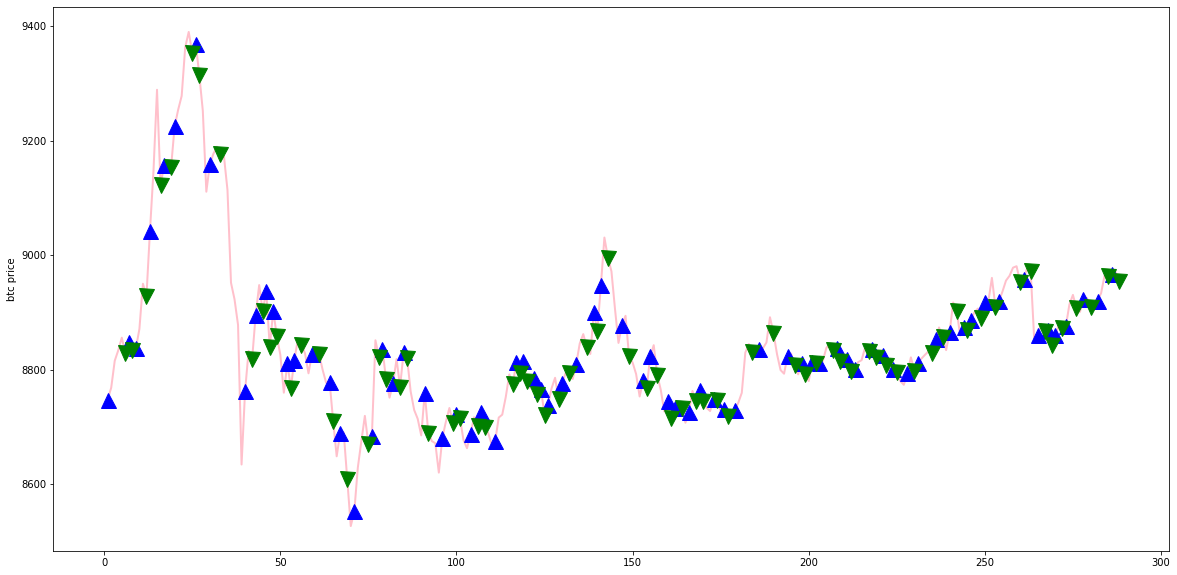

     positions     cash    total
229    8821.39 -7629.89  1191.50
230       0.00  1168.27  1168.27
231    8811.90 -7643.63  1168.27
232    8819.21 -7643.63  1175.58
233    8825.86 -7643.63  1182.23
234    8831.95 -7643.63  1188.32
235       0.00  1184.60  1184.60
236    8852.74 -7668.14  1184.60
237    8873.61 -7668.14  1205.47
238       0.00  1188.86  1188.86
239       0.00  1188.86  1188.86
240    8864.99 -7676.13  1188.86
241    8917.24 -7676.13  1241.11
242       0.00  1226.86  1226.86
243       0.00  1226.86  1226.86
244    8874.71 -7647.85  1226.86
245       0.00  1222.01  1222.01
246    8885.97 -7663.96  1222.01
247    8899.73 -7663.96  1235.77
248    8906.59 -7663.96  1242.63
249       0.00  1226.99  1226.99
250    8918.65 -7691.66  1226.99
251    8919.51 -7691.66  1227.85
252    8960.23 -7691.66  1268.57
253       0.00  1218.31  1218.31
254    8919.38 -7701.07  1218.31
255    8936.41 -7701.07  1235.34
256    8955.53 -7701.07  1254.46
257    8963.89 -7701.07  1262.82
258    897

<AxesSubplot:>

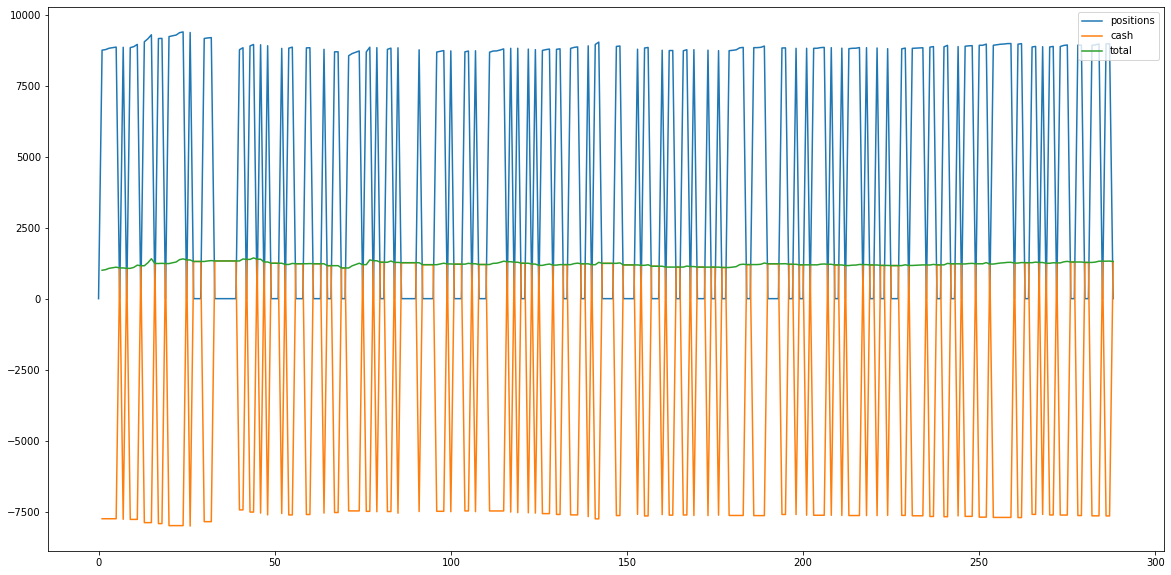

In [7]:
ex1 = pd.DataFrame()


ex1['price']     = df['Close'].astype('float128')
ex1['diff']      = ex1['price'].diff()
ex1['signal']    = np.where(ex1['diff'] > 0, 1,0)
ex1['positions'] = ex1['signal'].diff()
#ex1.set_index(df["Open time"], inplace=True)


ex1.astype({'price' : 'float', 
            'diff' : 'float', 
            'signal' : 'float', 
            'positions': 'float'
           })

#plot
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(ylabel='btc price')
ex1['price'].plot(ax=ax1 , color='pink', lw=2.) 

ax1.plot(ex1[ex1['positions'] ==  1].index, ex1['price'][ex1['positions'] ==  1] ,'^',markersize=15,color='b')
ax1.plot(ex1[ex1['positions'] == -1].index, ex1['price'][ex1['positions'] == -1] ,'v',markersize=15,color='g')
plt.show()

# BAcktesting
initial_capital = float(1000.0)

positions = pd.DataFrame(index=ex1.index).fillna(0.0)
portfolio = pd.DataFrame(index=ex1.index).fillna(0.0)
                
positions['btc'] = ex1['signal']

portfolio['positions'] = (positions.multiply(ex1['price'], axis=0 ))
portfolio['cash'] = initial_capital - ( positions.diff().multiply(ex1['price'], axis=0) ).cumsum()
portfolio['total'] = portfolio['positions'] + portfolio['cash']


print(portfolio.tail(60))

portfolio.plot(figsize=(20,10))